In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.inspection import permutation_importance

In [6]:
#load dataset into dataframe raw_df
raw_df = pd.read_csv('stats.csv')
raw_df.head(n=5)

,"last_name, first_name",player_id,year,pa,hit,single,double,triple,home_run,k_percent,...,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,groundballs_percent,flyballs_percent
0,"Cabrera, Miguel",408234,2020,231,51,37,4,0,10,22.1,...,36.8,9.7,5.8,49.7,102.655113,96.026886,31.6,47.7,42.6,21.9
1,"Cruz Jr., Nelson",443558,2020,214,56,34,6,0,16,27.1,...,39.4,15.0,3.9,47.2,102.723680,95.933078,34.2,47.6,47.2,21.3
2,"Peralta, David",444482,2020,218,61,45,10,1,5,20.6,...,29.4,5.0,6.3,36.3,100.556637,94.354591,21.1,46.6,51.2,18.8
3,"Longoria, Evan",446334,2020,209,49,31,10,1,7,18.7,...,29.9,11.5,3.8,45.2,101.530260,95.520896,21.0,45.0,50.3,25.5
4,"Cabrera, Asdrúbal",452678,2020,213,46,26,9,3,8,18.8,...,30.5,6.5,8.4,38.3,97.982869,93.323023,20.5,46.1,45.5,26.6


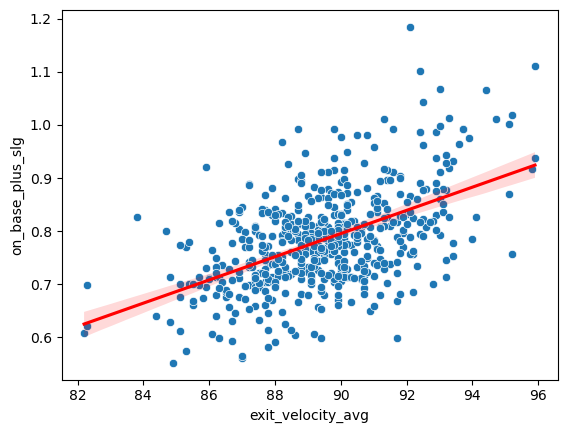

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
X = raw_df['exit_velocity_avg']
y = raw_df['on_base_plus_slg']
# ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 'avg_best_speed','avg_hyper_speed',
#       'whiff_percent', 'swing_percent',
#       'groundballs_percent', 'flyballs_percent']
# Example data
# x_data = [1, 2, 3, 4, 5]
# y_data = [2, 4, 5, 4, 5]

# # Create scatter plot
sns.scatterplot(x=X, y=y)

# # Add trend line
sns.regplot(x=X, y=y, scatter=False, color='red')

# # Show plot
plt.show()


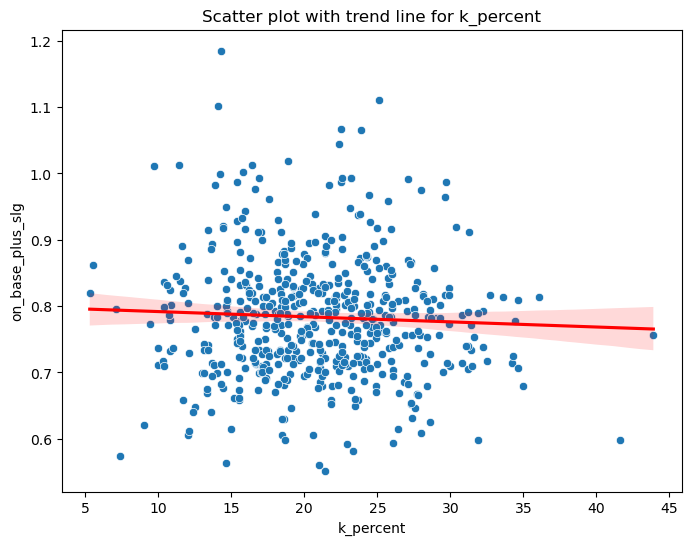

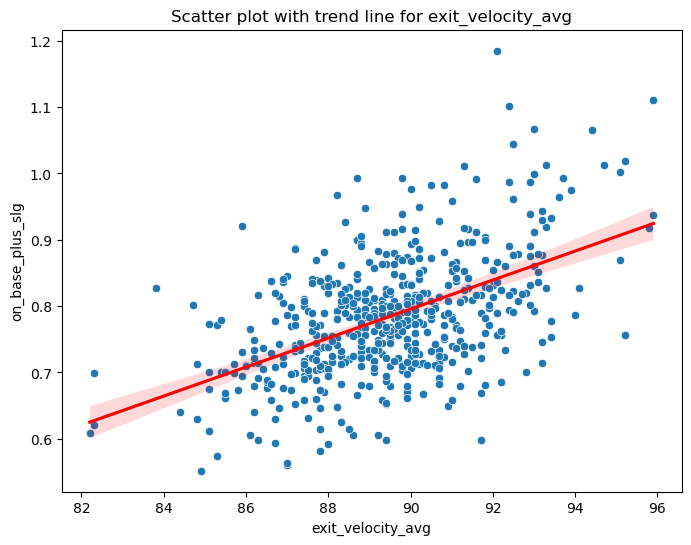

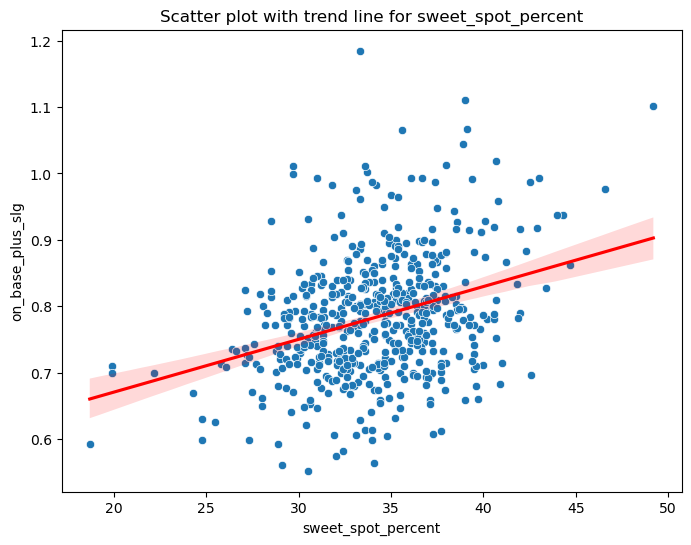

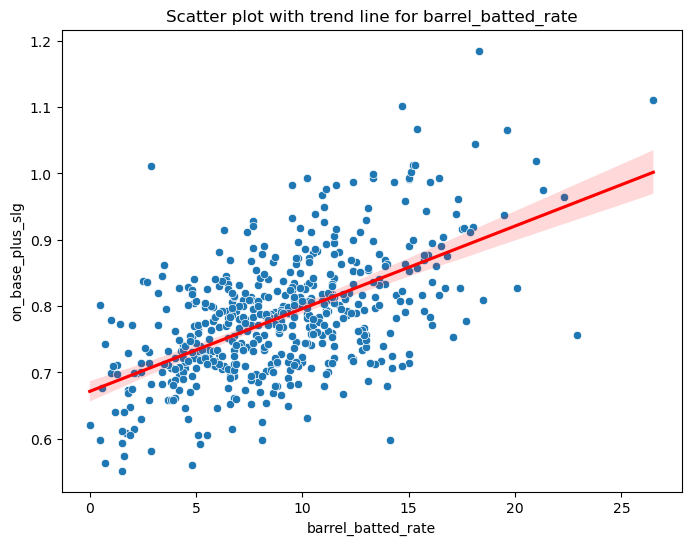

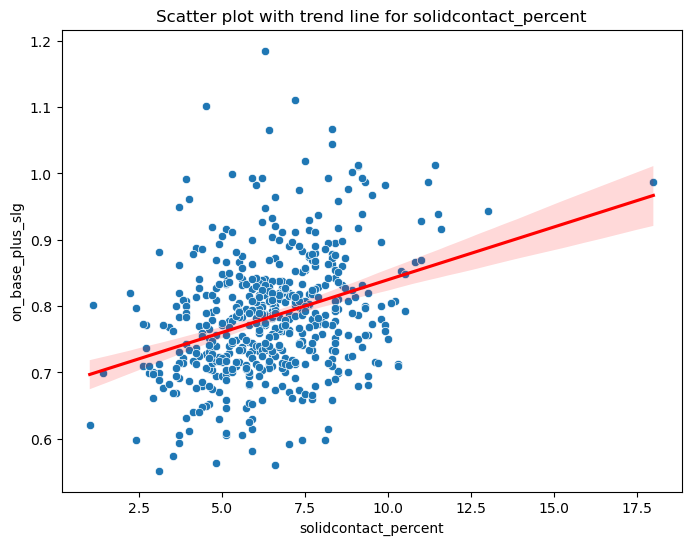

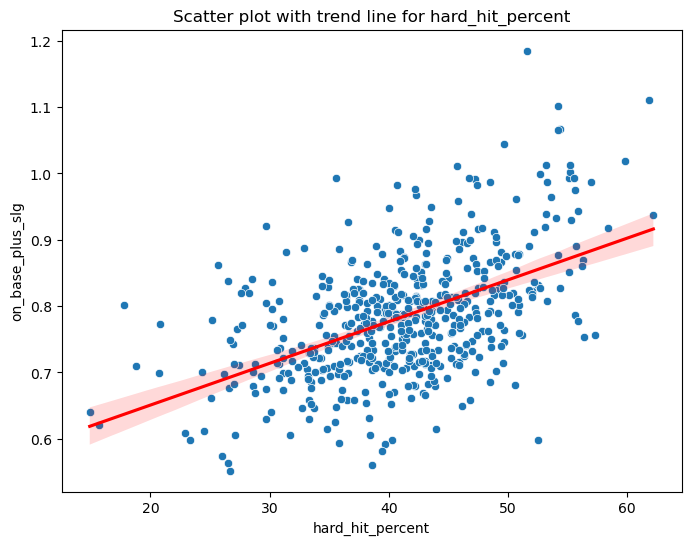

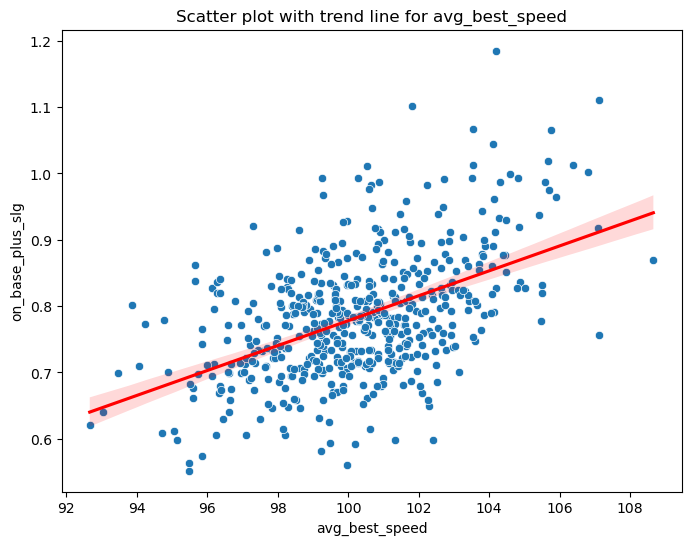

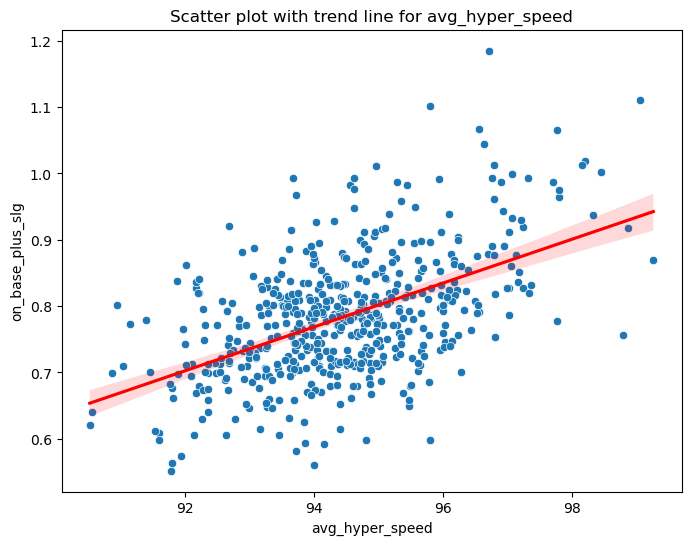

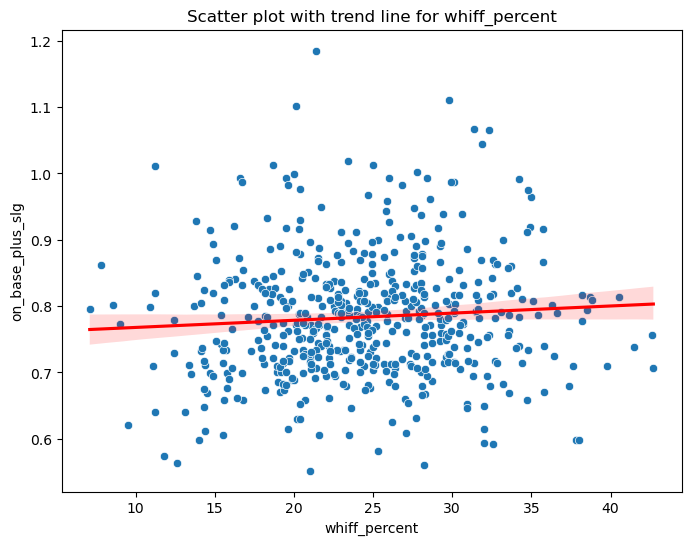

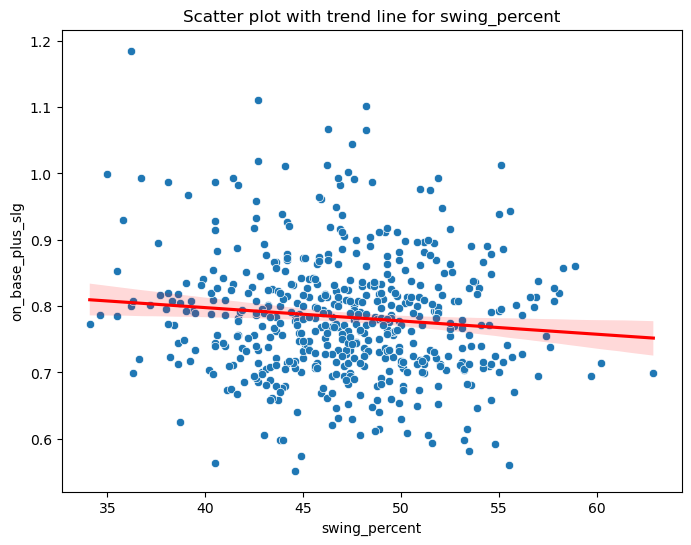

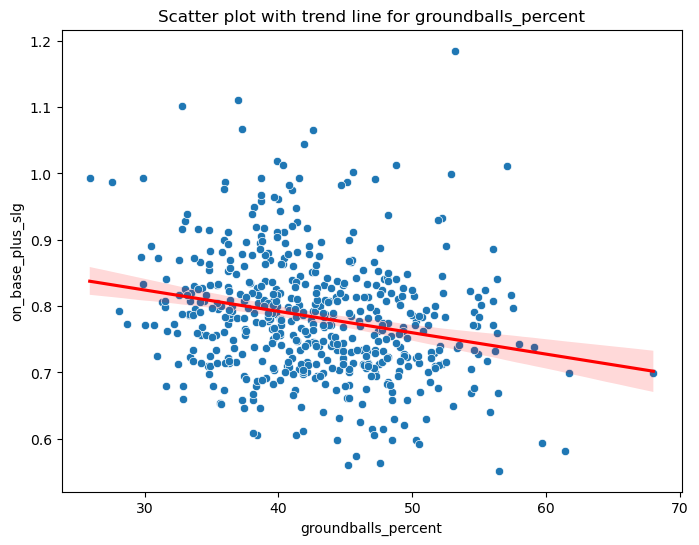

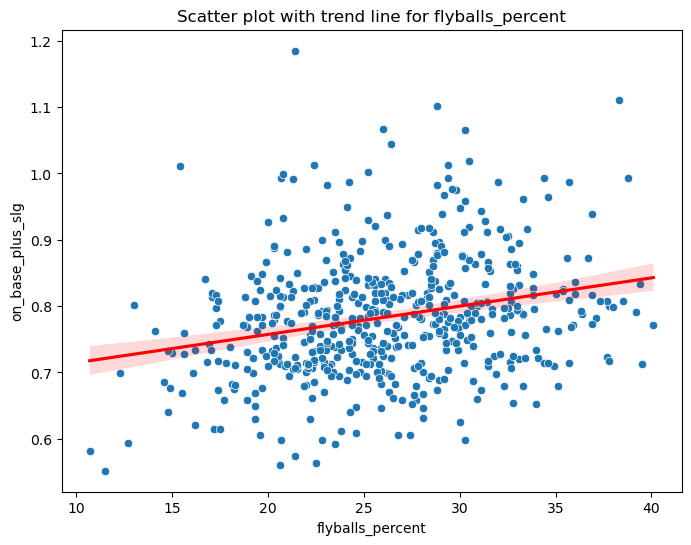

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['k_percent', 'exit_velocity_avg', 'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent', 'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed', 'whiff_percent', 'swing_percent', 'groundballs_percent', 'flyballs_percent']
y = raw_df['on_base_plus_slg']  # Assuming 'on_base_plus_slg' is the target variable

for feature in features:
    X = raw_df[feature]  # Access the feature column using the loop variable
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.scatterplot(x=X, y=y)
    sns.regplot(x=X, y=y, scatter=False, color='red')
    plt.xlabel(feature)  # Set x-axis label to the current feature
    plt.ylabel('on_base_plus_slg')  # Set y-axis label to the target variable
    plt.title(f'Scatter plot with trend line for {feature}')  # Set plot title
    plt.savefig(f'{feature}_scatter_plot.png')  # Save the figure as a PNG file
    plt.show()

In [3]:
print(f'The raw dataset consists of {len(raw_df)} observations on {(len(raw_df.columns))} features.\n')
print(f'Those features are: \n')
    
for column in raw_df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

The raw dataset consists of 538 observations on 23 features.

Those features are: 

last_name, first_name
player_id
year
pa
hit
single
double
triple
home_run
k_percent
bb_percent
on_base_plus_slg
exit_velocity_avg
sweet_spot_percent
barrel_batted_rate
solidcontact_percent
hard_hit_percent
avg_best_speed
avg_hyper_speed
whiff_percent
swing_percent
groundballs_percent
flyballs_percent

 Feature of interest: on_base_plus_slg


In [ ]:
####PREFORM EDA ON RAW_DF

In [ ]:
# #Getting a general idea of how highly correlated features are to see if we need to consider feature engineering or a different means to deal with them
# correlation_matrix = df.corr()

# # Define threshold
# threshold = 0.7  # Adjust the threshold as needed

# # Filter correlation matrix to find highly correlated pairs
# highly_correlated_pairs = []
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# # Display highly correlated pairs
# print("Pairs of variables with correlation greater than", threshold, ":")
# for pair in highly_correlated_pairs:
#     print(pair)

In [ ]:
#new dataframe for cleaning and pre-processing 
df = raw_df.copy()
#df.head(n=5)

In [ ]:
print(f'\n Checking for missing (Na) values: \n ')
print(f'{df.isna().sum()}')
print(f'\n Checking for duplicated values: \n ')
print(f'{df.duplicated().sum()}')

In [ ]:
#Dropping the name column --> not numeric or of interes
#Dropping the player_id column--> not numeric or of interest 
df.drop('last_name, first_name',axis = 1,inplace=True)
df.drop('player_id',axis = 1,inplace=True)
#df.head(n=1)

In [ ]:
print(f'Now there are {len(df)} observations on {(len(df.columns))} features.\n')
print(f'Those features are: \n')
    
for column in raw_df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

In [ ]:
#Splitting dataframe df into 3 different datasets: train_df, val_df, test_df
#There were 4 years (2020,2021,2022,2023) contained in the dataset df so a natural train,val,test split is on the years 


train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]

In [ ]:
n_2020= len(df[df['year']==2020]) 
n_2021= len(df[df['year']==2021])
n_2022= len(df[df['year']==2022])
n_2023= len(df[df['year']==2023])

print(f'In the original dataset there are {len(df)} observations.')
print(f'\n There are {n_2020 + n_2021} observations in the train dataset which consists of data from the years 2020 and 2021.')
print(f'\n There are {n_2022} observations in the val dataset which consists of data from the year 2022.')
print(f'\n There are {n_2023} observations in the test dataset which consists of data from the year 2023.')



## Linear Regression Training / Validation 
# all features

In [ ]:
# features = ['pa', 'hit', 'single', 'double', 'triple','home_run', 'k_percent', 'bb_percent',
#       'exit_velocity_avg',
#       'sweet_spot_percent', 'barrel_batted_rate',
#       'solidcontact_percent', 'hard_hit_percent', 
#       'avg_best_speed','avg_hyper_speed',
#       'whiff_percent', 'swing_percent',
#       'groundballs_percent', 'flyballs_percent']


last_name, first_name
player_id
year
pa
hit
single
double
triple
home_run

bb_percent
on_base_plus_slg






features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 'avg_best_speed','avg_hyper_speed',
      'whiff_percent', 'swing_percent',
      'groundballs_percent', 'flyballs_percent']
X_train = train_df[features]
y_train = train_df['on_base_plus_slg']

In [ ]:
###LINEAR REGRESSION TRAINNING
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
b = model.intercept_
w = model.coef_[0]
print(f'TRAINING:::intercept={b:.3}, slope={w:.3}')
print(f'Accuracy on Training Data R^2= {model.score(X_train,y_train):.3}')


In [ ]:
####VALIDATION
X_val = val_df[features]
y_val = val_df['on_base_plus_slg']

validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

In [ ]:
model.coef_

## PERMUTATION FEATURE IMPORTANCE ON LINEAR REGRESSION MODEL
##### THERE ARE MANY FEATURES AND ALL OF THEM HAVE VERY SMALL WEIGHTS (COEF VALUES) SO I AM GOING TO PERFORM PERMUTATION IMPORTANCE
##### PERMUTATION IMPORTANCE::::evalutates the contributions of each feature to a fitted model 

In [ ]:

X_feat_importance = val_df[features]
y_feat_importance = val_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_feat_importance, y_feat_importance)
pi = permutation_importance(estimator=model, X=X_feat_importance, y=y_feat_importance, random_state=0)
print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')
plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
plt.title('Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB')
plt.xlabel('feature name')
plt.xticks(rotation=45)
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')

In [ ]:
###ONLY CONSIDERING top 4 features: 'k_percent', ' exit_velocity_avg' , ' barrel_batted_rate, avg_hyper_speed avg_best_speed
features = ['k_percent','exit_velocity_avg','sweet_spot_percent','barrel_batted_rate','avg_hyper_speed','avg_best_speed']
X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

X_val = val_df[features]
y_val = val_df['on_base_plus_slg']
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

In [ ]:
###hit = single,double,triple--> so lets try that instead of hits,  
# features = ['single','double','triple','home_run','bb_percent']
# X_train = train_df[features]
# y_train = train_df['on_base_plus_slg']
# model = linear_model.LinearRegression()
# model.fit(X_train,y_train)
# print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

# X_val = val_df[features]
# y_val = val_df['on_base_plus_slg']
# validation_predictions = model.predict(X_val)
# MAE_val = mean_absolute_error(y_val,validation_predictions)
# MSE_val = mean_squared_error(y_val,validation_predictions)
# RMSE_val = np.sqrt(MSE_val)

# print("MAE_val: %f" % (MAE_val))
# print("RMSE_val: %f" % (RMSE_val))

In [ ]:
###hit = single,double,triple--> so lets try that instead of hits, also including k_percent
# features = ['single','double','triple','home_run','bb_percent','k_percent']
# X_train = train_df[features]
# y_train = train_df['on_base_plus_slg']
# model = linear_model.LinearRegression()
# model.fit(X_train,y_train)
# print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

# X_val = val_df[features]
# y_val = val_df['on_base_plus_slg']
# validation_predictions = model.predict(X_val)
# MAE_val = mean_absolute_error(y_val,validation_predictions)
# MSE_val = mean_squared_error(y_val,validation_predictions)
# RMSE_val = np.sqrt(MSE_val)

# print("MAE_val: %f" % (MAE_val))
# print("RMSE_val: %f" % (RMSE_val))

In [ ]:
###TEST LINEAR REGRESSION

In [ ]:

###Fun test to see how correctly we can predict a single players obps 
###Chosen player is Kwan, Steven

row_data = raw_df.iloc[529].to_frame().T
fun = pd.DataFrame(row_data)

features = ['pa','hit','home_run','bb_percent','on_base_plus_slg']
fun = fun[features]
fun_numeric = fun.apply(pd.to_numeric)

xfeatures = ['pa','hit','home_run','bb_percent']

X_fun = fun_numeric[xfeatures]



prediction = model.predict(X_fun)
predicted_obps = prediction[0] 


actual_obps = fun_numeric['on_base_plus_slg'].iloc[0]

print(f'The predicted obps is {predicted_obps:.3} and the actual obps is {actual_obps}.')

In [ ]:
###CREATE PLOTS 

CREATING A CLASSIFICATION PROBLEM 
BINNING OBPS 
An OPS scale

According to https://en.wikipedia.org/wiki/On-base_plus_slugging
"Bill James, in his essay titled "The 96 Families of Hitters"[4] uses seven different categories for classification by OPS:

| Category | Classification	| OPS range       |
|----------|----------------|-----------------|
|A         |	Great	    |.9000 and higher |
|B         |	Very good	|.8334 to .8999   |
|C         |Above average   |.7667 to .8333   |
|D         |	Average	    | .7000 to .7666  |
|E         |Below average	|.6334 to .6999   |
|F         |	Poor	    |.5667 to .6333   |
|G         |	Very poor   |.5666 and lower  |




I have created a scale such that we are classifying below, average and above average hitters based on their ops
The categories for classification by OPS I have created: 


| Category | Classification	| OPS range       |
|----------|----------------|-----------------|
|   1      |Above average   |.7667 and higher |
|0         |	Average	    | .7000 to .7666  |
|-1        |Below average	|.6999  and lower |


In [ ]:
#new dataset for classification
c_df = df.copy()

# Define the OPS ranges and corresponding classifications
ops_ranges = {
    1: (0.7667, float('inf')),
    0: (0.7000, 0.7666),
    -1: (-float('inf'), 0.6999)
}

# Create an empty list to store the classifications
classifications = []

# Iterate over each OPS value in your dataset
for ops_value in c_df['on_base_plus_slg']:
    # Iterate over each classification and its corresponding OPS range
    for classification, (lower_bound, upper_bound) in ops_ranges.items():
        # Check if the OPS value falls within the current classification's range
        if lower_bound <= ops_value < upper_bound:
            # If it does, append the classification to the list
            classifications.append(classification)
            # Break out of the inner loop since we found the correct classification
            break
    else:
        # If the OPS value didn't fall within any range, append a default value
        classifications.append('Unknown')

# Add the classifications to your dataset as a new column
c_df['Classification'] = classifications



#double checking that there are no missing or duplicated values for saftey 

if c_df.isna().any().any():
    print("There are missing values in the classification dataframe c_df.")
else:
    print("There are no missing values in the classification dataframe c_df")

if c_df.duplicated().any().any():
    print("There are duplicated values in the classification dataframe c_df.")
else:
    print("There are no duplicated values in the classification dataframe c_df")


In [ ]:
#creating new train,val,test datasets based on the same methodology as above 
c_train_df = c_df[(c_df['year'] == 2021) | (c_df['year'] == 2020)]
c_val_df = c_df[c_df.year==2022]
c_test_df = c_df[c_df.year==2023]